<a href="https://colab.research.google.com/github/akaicomet/NJOITOpenDataCenter-Pension-Record/blob/master/NJOITOpenDataCenter_Pension_Record_ModelEaluating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas
!pip install tqdm
!pip install scikit-learn
!pip install sodapy
!pip install matplotlib
!pip install hyperopt
!pip install bayesian-optimization
!pip install tbvaccine 
!pip install MulticoreTSNE
!pip install -U -q PyDrive

    100% |████████████████████████████████| 61kB 7.7MB/s 
    100% |████████████████████████████████| 829kB 24.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE
    100% |████████████████████████████████| 993kB 21.8MB/s 


#1. Copy python files from  GItHub repository to local

In [0]:
!git clone https://github.com/akaicomet/NJOITOpenDataCenter.git
!git clone https://github.com/akaicomet/akaicomet_Utility.git
!git clone https://github.com/akaicomet/akaicomet_Chart.git
!git clone https://github.com/akaicomet/akaicomet_ML.git

Cloning into 'NJOITOpenDataCenter'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 139 (delta 83), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (139/139), 11.22 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Cloning into 'akaicomet_Utility'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
Cloning into 'akaicomet_Chart'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 73 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
Cloning into 'akaicomet_ML'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
r

#2. Run .py files in local

In [0]:
%run -i /content/akaicomet_Utility/ErrorHandling.py

%run -i /content/NJOITOpenDataCenter/YourMoneyActivePensionMembers.py 
%run -i /content/NJOITOpenDataCenter/YourMoneyRetiredPensionMembers.py
%run -i /content/NJOITOpenDataCenter/YourMoneyPensionMembersMerge.py

%run -i /content/akaicomet_Chart/X-Ray_Scan.py
%run -i /content/akaicomet_Chart/akaicomet_Chart.py

%run -i /content/akaicomet_ML/ML_Init.py
%run -i /content/akaicomet_ML/ML_Auto.py
%run -i /content/akaicomet_ML/AutoFeatureEngineering.py


#3. Import libraries

In [0]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import random
from sodapy import Socrata
#from pandas.plotting import scatter_matrix
#from datetime import datetime
import seaborn as sb
from tqdm import tqdm
import warnings
from textwrap import wrap

#4. YourMoney and the NJOIT Open Data Center 
##4.1 YourMoney Active Pension Members API

**Pension member data load from NJOIT** 

In [0]:
client = Socrata("data.nj.gov", None)
results = client.get("45bd-gwii", limit=100000000)#100000000

**Data Cleansing and Preparation for YourMoney Active Pension Members data**

In [0]:
ActivePension_df = ActivePensionDataWrangler(results)

##4.2 YourMoney Retired Pension Members API
**Pension payment member data load from NJOIT**

In [0]:
results = client.get("8up4-62p6",   limit=100000000)

**Data Cleansing and Preparation for YourMoney Retired Pension data**

In [0]:
RetiredPension_df_grped = RetiredPensionMembersDataWrangler(results)

**Merge YourMoney Active Pension Members data and YourMoney Retired Pension data**

In [0]:
ActivePension_df = PensionMembersMerge(ActivePension_df,RetiredPension_df_grped)
del results

# 5 Recheck  Correlation Variable Validation:

In [0]:
#x_cols2 = ['_20_year_status',	'all_employers_salary_amt',		'employer_freq_pensioned', 'total_months_qty',	'location_freq_pensioned',		'current_employer_salary_rollingamt', 	'service_months_qty',	'pension_freq_pensioned', 'pension_fund_name_enc', 'pension_group_name_enc' ]
x_cols2 = ['_20_year_status','all_employers_salary_amt','employer_freq_pensioned','total_months_qty','location_freq_pensioned','service_months_qty','pension_freq_pensioned','pension_fund_name_enc','pension_group_name_enc' ]
ActivePension_df[x_cols2].corr()

,_20_year_status,all_employers_salary_amt,employer_freq_pensioned,total_months_qty,location_freq_pensioned,service_months_qty,pension_freq_pensioned,pension_fund_name_enc,pension_group_name_enc
_20_year_status,1.000000,0.296121,-0.075399,0.843661,0.082801,-0.001872,0.090456,-0.234559,-0.111928
all_employers_salary_amt,0.296121,1.000000,-0.067666,0.398653,-0.029870,-0.025237,-0.440353,0.207960,0.095488
employer_freq_pensioned,-0.075399,-0.067666,1.000000,-0.066242,0.191595,0.025102,0.042643,0.097229,-0.041309
total_months_qty,0.843661,0.398653,-0.066242,1.000000,0.065996,0.001912,0.044909,-0.182735,-0.119353
location_freq_pensioned,0.082801,-0.029870,0.191595,0.065996,1.000000,0.055229,0.306982,0.048206,-0.062512
service_months_qty,-0.001872,-0.025237,0.025102,0.001912,0.055229,1.000000,0.076532,0.056533,-0.033170
pension_freq_pensioned,0.090456,-0.440353,0.042643,0.044909,0.306982,0.076532,1.000000,-0.305136,-0.302495
pension_fund_name_enc,-0.234559,0.207960,0.097229,-0.182735,0.048206,0.056533,-0.305136,1.000000,0.180077
pension_group_name_enc,-0.111928,0.095488,-0.041309,-0.119353,-0.062512,-0.033170,-0.302495,0.180077,1.000000


#6 Initial Basic Model Selected 

In [0]:
y_train = ActivePension_df['IsPensionPaid']
X_train = ActivePension_df[x_cols2]

X_train = X_train.astype(float)

clfs = dict()
clfs_score = dict()

scaling_def = {'QuantileTransformer_n':QuantileTransformer(output_distribution='normal')}
redemensioning_def = {'PCA': PCA(n_components=0.99, svd_solver='full')}

for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(X_train,scaling_def)):
  for x in data:
    MLModelBuilding('RandomForestClassifier', x[1], x[0], y_train, 0.3, clfs, [0.1, 1],clfs_score)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.991172119418912
Test score: 0.9531462200090539
Test2 score: 0.979572204617474
RandomForestClassifier|PCA QuantileTransformer_n|



In [0]:
clfs['RandomForestClassifier|PCA QuantileTransformer_n|']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#7 Forecast Model Review

In [0]:
scaling_def = {'QuantileTransformer_n':QuantileTransformer(output_distribution='normal')}
redemensioning_def = {'PCA': PCA(n_components=0.99, svd_solver='full')}

sample = ActivePension_df[x_cols2 + ['IsPensionPaid']].sample(n=50000, random_state=5)
sample2 = ActivePension_df.sample(n=50000, random_state=5)

for data in map(lambda x:Redimensioning2(x[1],x[0],redemensioning_def), scaling3(sample[x_cols2],scaling_def)):
  for x in data:
    clf_pred = clfs['RandomForestClassifier|PCA QuantileTransformer_n|'].predict(x[0])

In [0]:
Predict_df = sample
Predict_df['Predict'] = clf_pred
sample2['Predict'] = clf_pred

## 7.1 Collect Mismatched Subset of Predicted and Actual data  

In [0]:
df_mismatched = sample2[sample2['IsPensionPaid'] != sample2['Predict']]

## 7.2 Feature Engineering for New Attributes

In [0]:
pd.DataFrame(df_mismatched.dtypes)

,0
_20_year_status,int64
all_employers_salary_amt,float64
current_employer_salary_amt,float64
employer_name,object
enrollment_date,object
location_code,int64
location_name,object
member_first_name,object
member_last_name,object
member_mi,object


In [0]:
for n, t in enumerate(df_mismatched.dtypes):
  if t == 'object':
    print(df_mismatched.dtypes.index.tolist()[n])

employer_name
enrollment_date
location_name
member_first_name
member_last_name
member_mi
pension_fund_name
pension_group_id
veteran_status
member_middle_initial


## 7.3 Find Attributes Contributing to Mismatching Subset

In [0]:
print(len(df_mismatched.groupby(['employer_name'])))
print(len(sample2.groupby(['employer_name'])))
df = (df_mismatched[['employer_name','IsPensionPaid']].groupby(['employer_name']).count()/len(df_mismatched)).sort_values('IsPensionPaid', ascending=False)
df['cum_sum'] = df.IsPensionPaid.cumsum()
df[df.cum_sum <= 0.9 ]

778
1698


,IsPensionPaid,cum_sum
employer_name,,
RUTGERS UNIVERSITY,0.022243,0.022243
ESSEX COUNTY,0.016524,0.038767
NJ TURNPIKE AUTHORITY,0.015888,0.054655
JERSEY CITY PUBLIC SCHOOLS,0.014935,0.069590
NEWARK PUBLIC SCHOOLS,0.011439,0.081030
DEPT OF CHILDREN AND FAMILIES,0.010804,0.091833
MOTOR VEHICLE COMMISSION,0.010804,0.102637
NEWARK CITY,0.010168,0.112806
OCEAN COUNTY,0.010168,0.122974


In [0]:
print(len(df_mismatched.groupby(['veteran_status'])))
print(len(sample2.groupby(['veteran_status'])))
(df_mismatched[['veteran_status','IsPensionPaid']].groupby(['veteran_status']).count()/len(df_mismatched)).sort_values('IsPensionPaid', ascending=False)

2
2


,IsPensionPaid
veteran_status,
0,0.982841
1,0.017159


In [0]:
print(len(df_mismatched.groupby(['location_name'])))
print(len(sample2.groupby(['location_name'])))
df = (df_mismatched[['location_name','IsPensionPaid']].groupby(['location_name']).count()/len(df_mismatched)).sort_values('IsPensionPaid', ascending=False)
df['cum_sum'] = df.IsPensionPaid.cumsum()
df[df.cum_sum <= 0.9 ]

23
23


,IsPensionPaid,cum_sum
location_name,,
STATEWIDE,0.287893,0.287893
ESSEX COUNTY,0.079123,0.367016
BERGEN COUNTY,0.066412,0.433429
HUDSON COUNTY,0.059739,0.493168
MIDDLESEX COUNTY,0.057197,0.550365
UNION COUNTY,0.053066,0.603432
MONMOUTH COUNTY,0.044169,0.647601
PASSAIC COUNTY,0.042262,0.689863
OCEAN COUNTY,0.041945,0.731808


In [0]:
print(len(df_mismatched.groupby(['pension_fund_name'])))
print(len(sample2.groupby(['pension_fund_name'])))
(df_mismatched[['pension_fund_name','IsPensionPaid']].groupby(['pension_fund_name']).count()/len(df_mismatched)).sort_values('IsPensionPaid', ascending=False)

4
4


,IsPensionPaid
pension_fund_name,
PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0.730537
TEACHERS' PENSION AND ANNUITY FUND,0.186209
POLICE AND FIREMEN'S RETIREMENT SYSTEM,0.081347
STATE POLICE RETIREMENT SYSTEM,0.001907


In [0]:
print(len(df_mismatched.groupby(['pension_group_id'])))
print(len(sample2.groupby(['pension_group_id'])))
(df_mismatched[['pension_group_id','IsPensionPaid']].groupby(['pension_group_id']).count()/len(df_mismatched)).sort_values('IsPensionPaid', ascending=False)

6
10


,IsPensionPaid
pension_group_id,
2,0.740705
1,0.242135
0,0.011122
3,0.002542
S,0.001907
P,0.001589


In [0]:


print(len(df_mismatched.groupby(['veteran_status'])))
print(len(sample2.groupby(['veteran_status'])))
(df_mismatched[['veteran_status','IsPensionPaid']].groupby(['veteran_status']).count()/len(df_mismatched)).sort_values('IsPensionPaid', ascending=False)

2
2


,IsPensionPaid
veteran_status,
0,0.982841
1,0.017159


## 7.4 Review Summary of Mismatched Data

In [0]:
df_mismatched.groupby(['employer_name','location_name','pension_fund_name','veteran_status'], as_index=False).count()

,employer_name,location_name,pension_fund_name,veteran_status,_20_year_status,all_employers_salary_amt,current_employer_salary_amt,enrollment_date,location_code,member_first_name,...,current_employer_salary_rollingamt,employer_rollingcnt,IsPensionPaid,member_middle_initial,employer_freq_pensioned,location_freq_pensioned,pension_freq_pensioned,pension_fund_name_enc,pension_group_name_enc,Predict
0,ABSECON CITY,ATLANTIC COUNTY,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,ALLAMUCHY TOWNSHIP,WARREN COUNTY,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,ANCORA PSYCHIATRIC HOSPITAL,STATEWIDE,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,ANDOVER REGIONAL BD OF ED,SUSSEX COUNTY,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,ANN KLEIN FORENSIC CENTER,STATEWIDE,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,ASBURY PARK CITY,MONMOUTH COUNTY,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,ATLANTIC CAPE COMMUNITY COLLEG,ATLANTIC COUNTY,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,ATLANTIC CITY,ATLANTIC COUNTY,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
8,ATLANTIC CITY BD OF ED,ATLANTIC COUNTY,PUBLIC EMPLOYEES' RETIREMENT SYSTEM,0,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
9,ATLANTIC CITY BD OF ED,ATLANTIC COUNTY,TEACHERS' PENSION AND ANNUITY FUND,0,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [0]:
df_describe = pd.merge(Predict_df[Predict_df['IsPensionPaid'] != Predict_df['Predict']].groupby('Predict').describe().T,Predict_df[Predict_df['IsPensionPaid'] == Predict_df['Predict']].groupby('IsPensionPaid').describe().T, left_index=True, right_index=True)

In [0]:
df_describe.columns = ['F0', 'F1', 'A0', 'A1']
df_describe

F0             F1             A0  \
_20_year_status          25%         1.000000       1.000000       1.000000   
                         50%         1.000000       1.000000       1.000000   
                         75%         1.000000       1.000000       1.000000   
                         count    3021.000000     126.000000   26016.000000   
                         max         1.000000       1.000000       1.000000   
                         mean        1.000000       1.000000       1.000000   
                         min         1.000000       1.000000       1.000000   
                         std         0.000000       0.000000       0.000000   
all_employers_salary_amt 25%     61098.000000   53385.000000   63813.000000   
                         50%     83449.000000   78190.000000   86083.000000   
                         75%    103922.000000  106324.250000  104030.000000   
                         count    3021.000000     126.000000   26016.000000   
                         max    270734.000000  211989.000000  363091.000000   
                         mean    85748.894075   83342.174603   86915.391067   
                         min      2492.000000    8776.000000     275.000000   
                         std     34734.460370   38055.429904   34133.998379   
employer_freq_pensioned  25%        17.000000      30.000000      14.000000   
                         50%        40.000000      63.000000      34.000000   
                         75%       104.000000      96.000000      82.000000   
                         count    3021.000000     126.000000   26016.000000   
                         max       573.000000     573.000000     573.000000   
                         mean       91.708375      83.714286      75.691459   
                         min         1.000000       1.000000       0.000000   
                         std       121.279711      89.605701     110.340458   
location_freq_pensioned  25%      1193.000000    1769.000000    1193.000000   
                         50%      1769.000000    6124.000000    1769.000000   
                         75%      6124.000000    6124.000000    6124.000000   
                         count    3021.000000     126.000000   26016.000000   
                         max      6124.000000    6124.000000    6124.000000   
                         mean     2701.352201    4191.460317    2751.581258   
...                                       ...            ...            ...   
pension_fund_name_enc    75%         0.456744       0.456744       0.456744   
                         count    3021.000000     126.000000   26016.000000   
                         max         0.911854       0.777435       0.911854   
                         mean        0.471890       0.473056       0.453804   
                         min         0.393575       0.393575       0.393575   
                         std         0.097117       0.074744       0.076829   
pension_group_name_enc   25%         0.464307       0.464307       0.464307   
                         50%         0.464307       0.464307       0.464307   
                         75%         0.493800       0.464307       0.493800   
                         count    3021.000000     126.000000   26016.000000   
                         max         0.911854       0.493800       0.911854   
                         mean        0.468425       0.461792       0.470260   
                         min         0.000000       0.000000       0.000000   
                         std         0.058101       0.041870       0.050951   
service_months_qty       25%         2.000000       3.000000       3.000000   
                         50%         5.000000       6.500000       5.000000   
                         75%         8.000000       9.000000       8.000000   
                         count    3021.000000     126.000000   26016.000000   
                         max        11.000000      11.000000      11.000000   
              

In [0]:
df_describe2 = pd.merge(sample2[sample2['IsPensionPaid'] != sample2['Predict']].groupby('Predict').describe().T,sample2[sample2['IsPensionPaid'] == sample2['Predict']].groupby('IsPensionPaid').describe().T, left_index=True, right_index=True)

In [0]:
df_describe2.columns = ['F0', 'F1', 'A0', 'A1']
df_describe2

F0             F1  \
_20_year_status                    25%         1.000000       1.000000   
                                   50%         1.000000       1.000000   
                                   75%         1.000000       1.000000   
                                   count    3021.000000     126.000000   
                                   max         1.000000       1.000000   
                                   mean        1.000000       1.000000   
                                   min         1.000000       1.000000   
                                   std         0.000000       0.000000   
all_employers_salary_amt           25%     61098.000000   53385.000000   
                                   50%     83449.000000   78190.000000   
                                   75%    103922.000000  106324.250000   
                                   count    3021.000000     126.000000   
                                   max    270734.000000  211989.000000   
                                   mean    85748.894075   83342.174603   
                                   min      2492.000000    8776.000000   
                                   std     34734.460370   38055.429904   
current_employer_salary_amt        25%     59864.000000   53385.000000   
                                   50%     82410.000000   77498.500000   
                                   75%    102903.000000  105672.750000   
                                   count    3021.000000     126.000000   
                                   max    270734.000000  211989.000000   
                                   mean    84470.733863   82736.992063   
                                   min      2000.000000    8776.000000   
                                   std     35126.772715   37660.861056   
current_employer_salary_rollingamt 25%         0.000000       0.000000   
                                   50%     51933.000000   53385.000000   
                                   75%     92112.000000   92821.250000   
                                   count    3021.000000     126.000000   
                                   max    270734.000000  190233.000000   
                                   mean    52694.705065   54501.063492   
...                                                 ...            ...   
pension_group_name_enc             75%         0.493800       0.464307   
                                   count    3021.000000     126.000000   
                                   max         0.911854       0.493800   
                                   mean        0.468425       0.461792   
                                   min         0.000000       0.000000   
                                   std         0.058101       0.041870   
service_months_qty                 25%         2.000000       3.000000   
                                   50%         5.000000       6.500000   
                                   75%         8.000000       9.000000   
                                   count    3021.000000     126.000000   
                                   max        11.000000      11.000000   
                                   mean        5.125124       6.031746   
                                   min         0.000000       0.000000   
                                   std         3.411449       3.367935   
service_years_qty                  25%        29.000000      29.000000   
                                   50%        31.000000      31.000000   
                                   75%        34.000000      35.000000   
                                   count    3021.000000     126.000000   
                                   max        57.000000      49.000000   
                                   mean       32.135055      32.214286   
                                   min        18.000000      25.000000   
                                   std         4.432081       4.922775   
total_months_qty                   25%       350.000000  

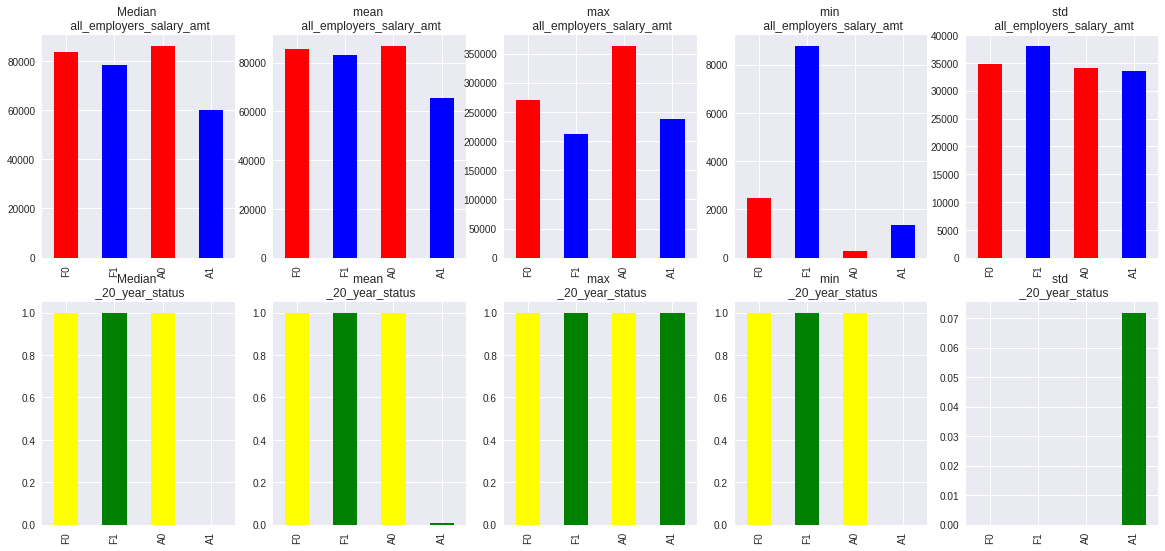

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 9))
df_describe.loc['all_employers_salary_amt',('50%')].plot(ax=axes[0, 0],title='Median \n all_employers_salary_amt',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['all_employers_salary_amt',('mean')].plot(ax=axes[0, 1],title='mean \n all_employers_salary_amt',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['all_employers_salary_amt',('max')].plot(ax=axes[0, 2],title='max \n all_employers_salary_amt',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['all_employers_salary_amt',('min')].plot(ax=axes[0, 3],title='min \n all_employers_salary_amt',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['all_employers_salary_amt',('std')].plot(ax=axes[0, 4],title='std \n all_employers_salary_amt',color=["red","blue","red","blue"], legend=False, kind='bar')

df_describe.loc['_20_year_status',('50%')].plot(ax=axes[1, 0],title='Median \n _20_year_status',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['_20_year_status',('mean')].plot(ax=axes[1, 1],title='mean \n _20_year_status',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['_20_year_status',('max')].plot(ax=axes[1, 2],title='max \n _20_year_status',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['_20_year_status',('min')].plot(ax=axes[1, 3],title='min \n _20_year_status',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['_20_year_status',('std')].plot(ax=axes[1, 4],title='std \n _20_year_status',color=["yellow","green","yellow","green"], legend=False, kind='bar')

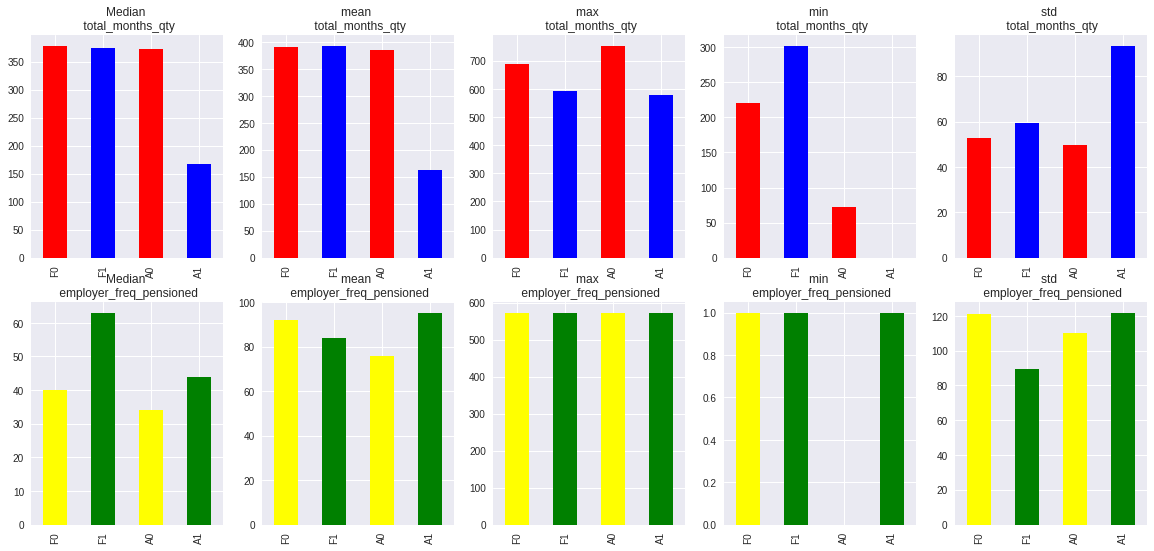

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 9))
df_describe.loc['total_months_qty',('50%')].plot(ax=axes[0, 0],title='Median \n total_months_qty',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['total_months_qty',('mean')].plot(ax=axes[0, 1],title='mean \n total_months_qty',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['total_months_qty',('max')].plot(ax=axes[0, 2],title='max \n total_months_qty',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['total_months_qty',('min')].plot(ax=axes[0, 3],title='min \n total_months_qty',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['total_months_qty',('std')].plot(ax=axes[0, 4],title='std \n total_months_qty',color=["red","blue","red","blue"], legend=False, kind='bar')

df_describe.loc['employer_freq_pensioned',('50%')].plot(ax=axes[1, 0],title='Median \n employer_freq_pensioned',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['employer_freq_pensioned',('mean')].plot(ax=axes[1, 1],title='mean \n employer_freq_pensioned',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['employer_freq_pensioned',('max')].plot(ax=axes[1, 2],title='max \n employer_freq_pensioned',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['employer_freq_pensioned',('min')].plot(ax=axes[1, 3],title='min \n employer_freq_pensioned',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['employer_freq_pensioned',('std')].plot(ax=axes[1, 4],title='std \n employer_freq_pensioned',color=["yellow","green","yellow","green"], legend=False, kind='bar')

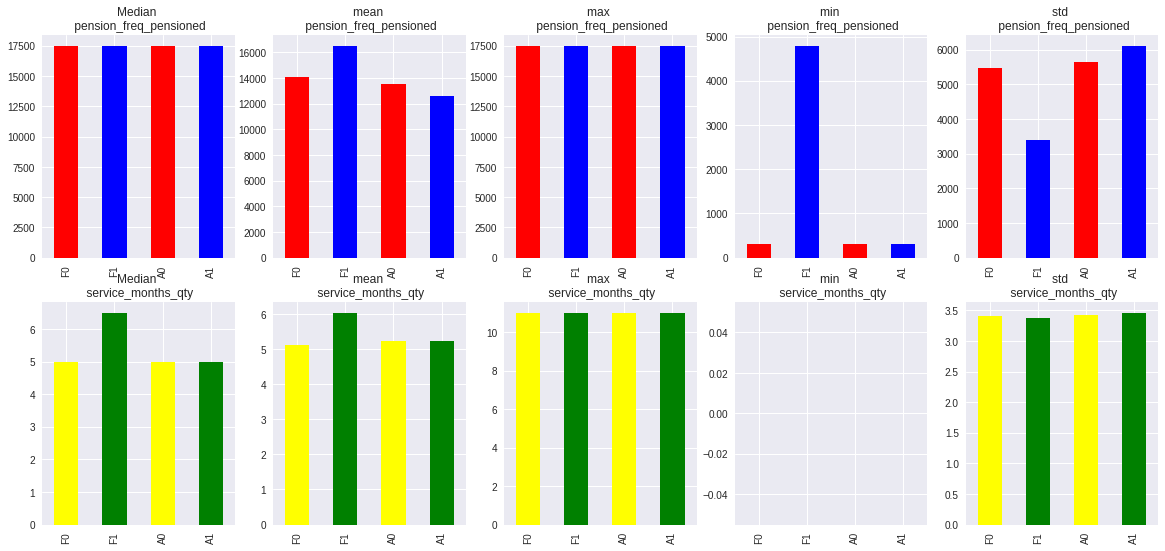

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 9))
df_describe.loc['pension_freq_pensioned',('50%')].plot(ax=axes[0, 0],title='Median \n pension_freq_pensioned',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['pension_freq_pensioned',('mean')].plot(ax=axes[0, 1],title='mean \n pension_freq_pensioned',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['pension_freq_pensioned',('max')].plot(ax=axes[0, 2],title='max \n pension_freq_pensioned',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['pension_freq_pensioned',('min')].plot(ax=axes[0, 3],title='min \n pension_freq_pensioned',color=["red","blue","red","blue"], legend=False, kind='bar')
df_describe.loc['pension_freq_pensioned',('std')].plot(ax=axes[0, 4],title='std \n pension_freq_pensioned',color=["red","blue","red","blue"], legend=False, kind='bar')

df_describe.loc['service_months_qty',('50%')].plot(ax=axes[1, 0],title='Median \n service_months_qty',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['service_months_qty',('mean')].plot(ax=axes[1, 1],title='mean \n service_months_qty',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['service_months_qty',('max')].plot(ax=axes[1, 2],title='max \n service_months_qty',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['service_months_qty',('min')].plot(ax=axes[1, 3],title='min \n service_months_qty',color=["yellow","green","yellow","green"], legend=False, kind='bar')
df_describe.loc['service_months_qty',('std')].plot(ax=axes[1, 4],title='std \n service_months_qty',color=["yellow","green","yellow","green"], legend=False, kind='bar')